# Modeling of the BLR with CLOUDY

Cloudy determines the physical conditions within a non-equilibrium gas, possibly exposed to an external source of radiation, and predicts the resulting spectrum

To run Cloudy: `/Users/tharacaba/Cloudy/c23.01/source/cloudy.exe -e`

## Simulation 1: Planetary nebula

1) Plot spectrum of PNe for different abundances and discuss why do we see differences in spectra

Input file 1: 

`blackbody, T=1e5 K # the continuum shape` \
`luminosity total 38    # the luminosity, log erg s-1`\
`radius 18 # the log of the inner radius in cm`\
`hden 5    # the log of the hydrogen density cm-3`\
`sphere`\
`abundances planetary nebula`\
`save overview "pn.ovr"`\
`save continuum "pn.con" units microns`

Input file 2:

`blackbody, T=1e5 K # the continuum shape`\
`luminosity total 38    # the luminosity, log erg s-1`\
`radius 18 # the log of the inner radius in cm`\
`hden 5    # the log of the hydrogen density cm-3`\
`sphere`\
`#abundances planetary nebula`\
`save overview "pn.ovr"`
`save continuum "pn.con" units microns`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plan = pd.read_csv('planpn.con', sep = "\t")
plan.columns.values

array(['#Cont  nu', 'incident', 'trans', 'DiffOut', 'net trans', 'reflc',
       'total', 'reflin', 'outlin', 'lineID', 'cont', 'nLine'],
      dtype=object)

In [7]:
plan2 = pd.read_csv('plan2pn.con', sep = "\t")
plan2.columns.values

array(['#Cont  nu', 'incident', 'trans', 'DiffOut', 'net trans', 'reflc',
       'total', 'reflin', 'outlin', 'lineID', 'cont', 'nLine'],
      dtype=object)

/Users/tharacaba/opt/anaconda3/envs/agn/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tharacaba/opt/anaconda3/envs/agn/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


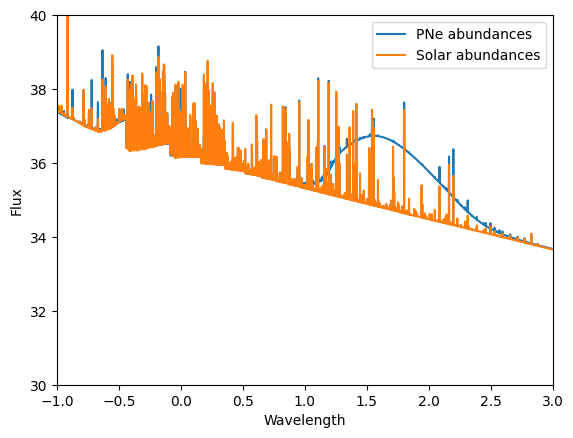

In [7]:
plt.plot(np.log10(plan['#Cont  nu']), np.log10(plan['net trans']), label='PNe abundances')
plt.plot(np.log10(plan2['#Cont  nu']), np.log10(plan2['net trans']), label='Solar abundances')
plt.xlabel('Wavelength')
plt.xlim(-1, 3)
plt.ylim(30, 40)
plt.ylabel('Flux')
plt.legend()
plt.show()

We see difference in spectra due to the differences in abundances since different elements will produce different spectral lines. 

2) Plot the temperature of the PNe from the overview file, i.e. the distance from the center (first column) vs. gas temperature (second column)

In [3]:
plan = pd.read_csv('planpn.ovr', sep = "\t")
plan.columns.values

array(['#depth', 'Te', 'Htot', 'hden', 'eden', '2H_2/H', 'HI', 'HII',
       'HeI', 'HeII', 'HeIII', 'CO/C', 'C1', 'C2', 'C3', 'C4', 'O1', 'O2',
       'O3', 'O4', 'O5', 'O6', 'H2O/O', 'AV(point)', 'AV(extend)',
       'Tau912'], dtype=object)

In [9]:
plan2 = pd.read_csv('plan2pn.ovr', sep = "\t")
plan2.columns.values

array(['#depth', 'Te', 'Htot', 'hden', 'eden', '2H_2/H', 'HI', 'HII',
       'HeI', 'HeII', 'HeIII', 'CO/C', 'C1', 'C2', 'C3', 'C4', 'O1', 'O2',
       'O3', 'O4', 'O5', 'O6', 'H2O/O', 'AV(point)', 'AV(extend)',
       'Tau912'], dtype=object)

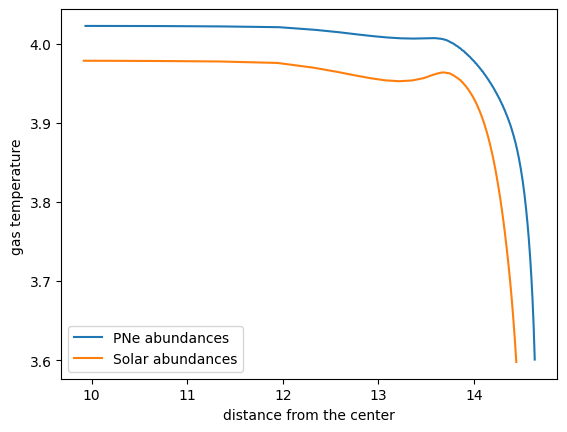

In [10]:
plt.plot(np.log10(plan['#depth']), np.log10(plan['Te']), label='PNe abundances')
plt.plot(np.log10(plan2['#depth']), np.log10(plan2['Te']), label='Solar abundances')
plt.xlabel('distance from the center')
#plt.xlim(-1, 3)
#plt.ylim(30, 40)
plt.ylabel('gas temperature ')
plt.legend()
plt.show()

## Simulation 2: QSO broad line region

3) Perform a simulation of the BLR cloud and plot the spectrum in the range 0.1-10 microns.

In [11]:
QSO = pd.read_csv('blr.con', sep = "\t")
QSO.columns.values

array(['#Cont  nu', 'incident', 'trans', 'DiffOut', 'net trans', 'reflc',
       'total', 'reflin', 'outlin', 'lineID', 'cont', 'nLine'],
      dtype=object)

/Users/tharacaba/opt/anaconda3/envs/agn/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


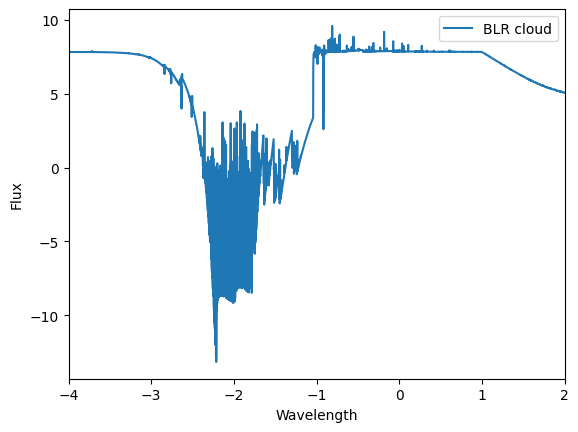

In [18]:
plt.plot(np.log10(QSO['#Cont  nu']), np.log10(QSO['net trans']), label='BLR cloud')
plt.xlabel('Wavelength')
plt.xlim(-4, 2)
#plt.ylim(30, 40)
plt.ylabel('Flux')
plt.legend()
plt.show()